In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import matplotlib.pyplot as plt
import pickle

from Configs import getEnvConfig, visualizeEnvConfig, getPredictorConfig, visualizePredictorConfig
from EnvLibs import PolicyDemoAdaptiveAlpha, PolicySimulator, createEnv
from MdpSolverLibs import MdpKernel

In [2]:
configIdx = 4
envParams = getEnvConfig(configIdx)
visualizeEnvConfig(envParams)
predictorParams = getPredictorConfig(configIdx)
visualizePredictorConfig(predictorParams)
trafficDataParentPath = f'Results/TrafficData'
env = createEnv(envParams, trafficDataParentPath)
env.selectMode(mode="test", type="data")

Environment Configuration
Number of Users:        8
Window Length:          200
Dataflow:               thumb_fr
N_aggregation:          4
Resource Bar:           5
Bandwidth:              200
M List:                 [3, 4, 5]
Random Seed:            999
Alpha Range:            (0.01, 1.0)
Discrete Alpha Steps:   10
Predictor Configuration
Window Length:          200
Upsample K:             10
Dataflow:               thumb_bk
DB Parameter:           0.012
Alpha:                  0.01
Mode:                   fixed
Direction:              backward
Train Ratio:            0.6
Train Data Augment:     False
Smooth Fc:              1.5
Smooth Order:           3


(100, 8)
(100, 8)


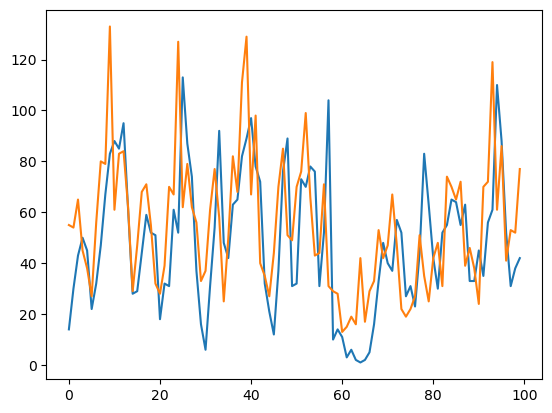

In [3]:
env.reset()
env.selectMode(mode="test", type="data")
u_record = []
u_predicted_record = []
for _ in range(100):
    env.updateStates()
    u, u_predicted = env.getStates()
    u_record.append(u)
    u_predicted_record.append(u_predicted)

u_record = np.array(u_record)
u_predicted_record = np.array(u_predicted_record)
print(u_record.shape)
print(u_predicted_record.shape)
plt.plot(u_record[:,0].flatten())
plt.plot(u_predicted_record[:,0].flatten())
plt.show()